# Feature Engineering(Khulna-2018 Dataset)

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Khulna\\real_2018.csv")

In [3]:
aqi_data.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21,25.5,18,1010.9,77,5.1,0,-,NaN,NaN
1,2,18.6,22.5,16,1011.7,85,5,0,-,39.0,G
2,3,17.4,23.2,13.5,1012.7,72,4.8,1.7,7.6,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0,EU


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   D         365 non-null    object 
 1   T         225 non-null    object 
 2   TM        225 non-null    object 
 3   Tm        225 non-null    object 
 4   SLP       225 non-null    object 
 5   H         225 non-null    object 
 6   VV        225 non-null    object 
 7   V         225 non-null    object 
 8   VM        225 non-null    object 
 9   AQI       216 non-null    float64
 10  Category  216 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.5+ KB


In [5]:
pd.options.display.max_columns = None
display(aqi_data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21,25.5,18,1010.9,77,5.1,0,-,NaN,NaN
1,2,18.6,22.5,16,1011.7,85,5,0,-,39.0,G
2,3,17.4,23.2,13.5,1012.7,72,4.8,1.7,7.6,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,-,-,-,-,-,-,-,-,NaN,NaN
361,28,-,-,-,-,-,-,-,-,NaN,NaN
362,29,-,-,-,-,-,-,-,-,NaN,NaN
363,30,-,-,-,-,-,-,-,-,NaN,NaN


In [6]:
aqi_data.isnull().sum()

D             0
T           140
TM          140
Tm          140
SLP         140
H           140
VV          140
V           140
VM          140
AQI         149
Category    149
dtype: int64

In [7]:
aqi = aqi_data.replace("-",np.nan)
aqi

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21,25.5,18,1010.9,77,5.1,0,NaN,NaN,NaN
1,2,18.6,22.5,16,1011.7,85,5,0,NaN,39.0,G
2,3,17.4,23.2,13.5,1012.7,72,4.8,1.7,7.6,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
aqi.isnull().sum()

D             0
T           212
TM          212
Tm          212
SLP         212
H           212
VV          212
V           212
VM          239
AQI         149
Category    149
dtype: int64

<AxesSubplot:>

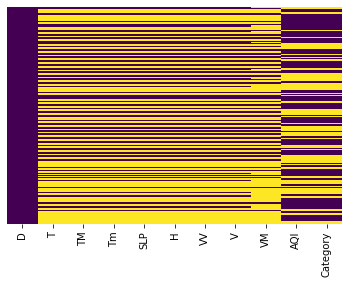

In [9]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

                   1. Delete row data.
                   2. Create new model.
                   3. Statistical Method(Mean,Median,Mode)
                   
                   But here we use Statistical Method(Mean)

T = Average Temperature (°C) , TM = Maximum temperature (°C),

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa),

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index


# Convert object type as float type

In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1(January)

Find monthly mean

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.0,25.5,18.0,1010.9,77.0,5.1,0.0,NaN,NaN,NaN
1,2,18.6,22.5,16.0,1011.7,85.0,5.0,0.0,NaN,39.0,G
2,3,17.4,23.2,13.5,1012.7,72.0,4.8,1.7,7.6,NaN,NaN
28,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402.0,EU
29,30,18.4,26.2,12.0,1012.4,64.0,4.3,0.9,3.5,339.0,EU
30,31,19.1,27.2,12.4,1011.8,72.0,4.2,0.4,3.5,306.0,EU


In [12]:
df1.isnull().sum()

D            0
T           20
TM          20
Tm          20
SLP         20
H           20
VV          20
V           20
VM          24
AQI          4
Category     4
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())
df1["AQI"] = df1["AQI"].fillna(value=df1["AQI"].mean())


In [14]:
df1.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.000000,25.5,18.000000,1010.900000,77.000000,5.100000,0.000000,4.128571,346.222222,NaN
1,2,18.600000,22.5,16.000000,1011.700000,85.000000,5.000000,0.000000,4.128571,39.000000,G
2,3,17.400000,23.2,13.500000,1012.700000,72.000000,4.800000,1.700000,7.600000,346.222222,NaN
3,4,17.536364,24.0,12.536364,1012.672727,76.272727,4.390909,0.509091,4.128571,396.000000,EU
4,5,17.536364,24.0,12.536364,1012.672727,76.272727,4.390909,0.509091,4.128571,372.000000,EU


In [15]:
df1.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-2 (February)

In [16]:
df2 = aqi.iloc[31:59,0:11]
df2.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,21.0,26.5,13.5,1011.6,61.0,4.8,0.0,NaN,329.0,EU
32,2,20.9,27.5,15.0,1012.0,70.0,4.5,0.0,NaN,363.0,EU
33,3,21.2,28.7,13.5,1013.2,73.0,4.5,0.6,3.5,358.0,EU
56,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,M
57,27,25.7,32.5,20.5,1011.1,79.0,5.6,0.6,3.5,113.0,C
58,28,25.9,31.5,21.8,1011.2,78.0,5.1,0.7,3.5,160.0,U


In [17]:
df2.isnull().sum()

D            0
T           14
TM          14
Tm          14
SLP         14
H           14
VV          14
V           14
VM          17
AQI          4
Category     4
dtype: int64

In [18]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())
df2["AQI"] = df2["AQI"].fillna(value=df2["AQI"].mean())


In [19]:
df2.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,Feb-01,21.000000,26.5,13.500000,1011.6,61.000000,4.800000,0.000000,4.1,329.0,EU
32,2,20.900000,27.5,15.000000,1012.0,70.000000,4.500000,0.000000,4.1,363.0,EU
33,3,21.200000,28.7,13.500000,1013.2,73.000000,4.500000,0.600000,3.5,358.0,EU
34,4,22.878571,29.5,16.885714,1012.8,69.142857,4.985714,0.664286,4.1,154.0,U
35,5,22.878571,29.5,16.885714,1012.8,69.142857,4.985714,0.664286,4.1,153.0,U


In [20]:
df2.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-3(March)

In [21]:
df3 = aqi.iloc[59:90,0:11]
df3.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,25.6,32.0,21.0,1010.0,77.0,4.8,0.0,NaN,132.0,C
60,2,26.7,33.5,20.0,1008.3,72.0,4.5,1.5,7.6,NaN,NaN
61,3,26.7,34.0,22.5,1006.9,75.0,4.8,1.7,7.6,NaN,NaN
87,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,31,25.7,30.5,20.4,1009.9,74.0,5.6,3.1,7.6,NaN,NaN


In [22]:
df3.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          16
AQI         15
Category    15
dtype: int64

In [23]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())
df3["AQI"] = df3["AQI"].fillna(value=df3["AQI"].mean())

In [24]:
df3.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
59,Mar-01,25.60000,32.0000,21.00000,1010.0000,77.0000,4.80000,0.0000,4.993333,132.0000,C
60,2,26.70000,33.5000,20.00000,1008.3000,72.0000,4.50000,1.5000,7.600000,108.4375,NaN
61,3,26.70000,34.0000,22.50000,1006.9000,75.0000,4.80000,1.7000,7.600000,108.4375,NaN
62,4,27.28125,33.5125,21.44375,1009.8625,67.9375,5.48125,1.2625,4.993333,108.4375,NaN
63,5,27.28125,33.5125,21.44375,1009.8625,67.9375,5.48125,1.2625,4.993333,108.4375,NaN


In [25]:
df3.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    15
dtype: int64

# Month-4(April)

In [26]:
df4 = aqi.iloc[90:120,0:11]
df4.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,26.3,34.2,19.4,1010.1,67.0,5.5,2.6,11.1,NaN,NaN
91,2,25.2,29.5,21.8,1010.2,74.0,5.6,0.9,3.5,117.0,C
92,3,26.3,33.5,21.2,1008.6,74.0,6.3,0.0,NaN,131.0,C
117,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df4.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          17
AQI         14
Category    14
dtype: int64

In [28]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())
df4["AQI"] = df4["AQI"].fillna(value=df4["AQI"].mean())



In [29]:
df4.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
90,Apr-01,26.300000,34.200000,19.40,1010.10,67.000000,5.500000,2.60,11.100000,61.625,NaN
91,2,25.200000,29.500000,21.80,1010.20,74.000000,5.600000,0.90,3.500000,117.000,C
92,3,26.300000,33.500000,21.20,1008.60,74.000000,6.300000,0.00,7.923077,131.000,C
93,4,28.713333,34.233333,22.98,1008.36,70.466667,6.073333,3.08,7.923077,129.000,C
94,5,28.713333,34.233333,22.98,1008.36,70.466667,6.073333,3.08,7.923077,62.000,M


In [30]:
df4.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    14
dtype: int64

# Month-5 (May)

In [31]:
df5 = aqi.iloc[120:151,0:11]
df5.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,27.8,33.0,20.5,1007.5,77.0,6.3,0.0,NaN,NaN,NaN
121,2,26.3,35.2,22.2,1008.3,78.0,6.4,1.5,11.1,NaN,NaN
122,3,28.2,33.2,21.5,1009.0,73.0,6.0,0.7,5.4,NaN,NaN
148,29,31.3,34.5,27.5,1001.0,71.0,6.8,1.1,3.5,NaN,NaN
149,30,32.4,36.7,28.6,1001.6,66.0,6.6,3.7,7.6,NaN,NaN
150,31,28.0,34.5,26.7,1004.8,86.0,6.0,4.8,9.4,17.0,G


In [32]:
df5.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          18
AQI         18
Category    18
dtype: int64

In [33]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())
df5["AQI"] = df5["AQI"].fillna(value=df5["AQI"].mean())

In [34]:
df5.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
120,May-01,27.800000,33.000000,20.50,1007.50,77.000000,6.300000,0.000000,8.684615,31.0,NaN
121,2,26.300000,35.200000,22.20,1008.30,78.000000,6.400000,1.500000,11.100000,31.0,NaN
122,3,28.200000,33.200000,21.50,1009.00,73.000000,6.000000,0.700000,5.400000,31.0,NaN
123,4,29.153333,33.853333,24.98,1005.46,77.733333,6.073333,3.666667,8.684615,31.0,NaN
124,5,29.153333,33.853333,24.98,1005.46,77.733333,6.073333,3.666667,8.684615,31.0,NaN


In [35]:
df5.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    18
dtype: int64

# Month-6 (June)

In [36]:
df6 = aqi.iloc[151:181,0:11]
df6.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,27.9,34.0,26.0,1006.0,86.0,6.4,0.7,1.9,18.0,G
152,2,30.6,35.5,25.5,1005.0,74.0,6.4,2.2,3.5,23.0,G
153,3,29.3,34.8,27.0,1002.2,81.0,6.1,1.3,3.5,27.0,G
178,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,G
180,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df6.isnull().sum()

D            0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI         12
Category    12
dtype: int64

In [38]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())


In [39]:
df6.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
151,Jun-01,27.900000,34.00,26.00,1006.00,86.0,6.4,0.700000,1.900000,18.0,G
152,2,30.600000,35.50,25.50,1005.00,74.0,6.4,2.200000,3.500000,23.0,G
153,3,29.300000,34.80,27.00,1002.20,81.0,6.1,1.300000,3.500000,27.0,G
154,4,30.193333,34.72,26.72,1000.08,80.8,6.2,1.666667,4.226667,32.0,G
155,5,30.193333,34.72,26.72,1000.08,80.8,6.2,1.666667,4.226667,32.0,G


In [40]:
df6.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    12
dtype: int64

# Month-7 (July)

In [41]:
df7 = aqi.iloc[181:212,0:11]
df7.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,G
182,2,29.7,33.4,27.0,1001.2,85.0,6.0,3.3,7.6,32.0,G
183,3,28.4,30.5,25.6,1000.2,94.0,5.5,0.4,3.5,NaN,NaN
209,29,29.1,33.0,26.2,999.9,87.0,5.8,2.2,5.4,47.0,G
210,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df7.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI         14
Category    14
dtype: int64

In [43]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())
df7["AQI"] = df7["AQI"].fillna(value=df7["AQI"].mean())

In [44]:
df7.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
181,Jul-01,29.006667,32.306667,26.653333,998.98,88.2,5.92,2.86,6.086667,44.000000,G
182,2,29.700000,33.400000,27.000000,1001.20,85.0,6.00,3.30,7.600000,32.000000,G
183,3,28.400000,30.500000,25.600000,1000.20,94.0,5.50,0.40,3.500000,28.705882,NaN
184,4,28.200000,30.500000,26.600000,1000.00,92.0,5.60,0.70,3.500000,29.000000,G
185,5,29.006667,32.306667,26.653333,998.98,88.2,5.92,2.86,6.086667,45.000000,G


In [45]:
df7.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    14
dtype: int64

# Month-8 (August)

In [46]:
df8 = aqi.iloc[212:243,0:11]
df8.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,26.9,28.0,25.5,999.3,92.0,6.0,2.8,5.4,NaN,NaN
213,2,28.4,31.8,26.0,1001.3,85.0,6.0,0.4,3.5,52.0,M
214,3,28.6,33.0,26.2,1000.5,89.0,5.8,1.3,3.5,NaN,NaN
240,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,G
241,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,G
242,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,G


In [47]:
df8.isnull().sum()

D            0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI         11
Category    11
dtype: int64

In [48]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [49]:
df8.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
212,Aug-01,26.90,28.000000,25.500000,999.3,92.000000,6.000000,2.8,5.40,32.75,NaN
213,2,28.40,31.800000,26.000000,1001.3,85.000000,6.000000,0.4,3.50,52.00,M
214,3,28.60,33.000000,26.200000,1000.5,89.000000,5.800000,1.3,3.50,32.75,NaN
215,4,29.28,32.786667,26.646667,1000.2,84.466667,6.006667,3.6,6.98,32.75,NaN
216,5,29.28,32.786667,26.646667,1000.2,84.466667,6.006667,3.6,6.98,32.75,NaN


In [50]:
df8.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    11
dtype: int64

# Month-9 (September)

In [51]:
df9 = aqi.iloc[243:273,0:11]
df9.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,29.4,33.0,27.0,1003.0,84.0,6.4,2.4,7.6,22.0,G
244,2,28.9,31.5,27.0,1003.3,87.0,5.8,3.3,5.4,20.0,G
245,3,28.3,32.5,26.6,1003.4,89.0,5.6,0.6,1.9,31.0,G
270,28,31.0,35.7,27.0,1008.3,82.0,5.8,0.0,NaN,NaN,NaN
271,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,M


In [52]:
df9.isnull().sum()

D            0
T           18
TM          18
Tm          18
SLP         18
H           18
VV          18
V           18
VM          19
AQI         19
Category    19
dtype: int64

In [53]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())
df9["AQI"] = df9["AQI"].fillna(value=df9["AQI"].mean())


In [54]:
df9.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
243,Sep-01,29.400000,33.000000,27.000000,1003.000000,84.00,6.4,2.400000,7.600000,22.0,G
244,2,28.900000,31.500000,27.000000,1003.300000,87.00,5.8,3.300000,5.400000,20.0,G
245,3,28.300000,32.500000,26.600000,1003.400000,89.00,5.6,0.600000,1.900000,31.0,G
246,4,29.708333,33.858333,26.691667,1005.833333,84.25,6.0,1.208333,4.027273,42.0,G
247,5,29.708333,33.858333,26.691667,1005.833333,84.25,6.0,1.208333,4.027273,31.0,G


In [55]:
df9.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    19
dtype: int64

# Month-10 (October)

In [56]:
df10 = aqi.iloc[273:304,0:11]
df10.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,30.2,36.5,25.5,1008.8,76.0,6.3,0.0,NaN,123.0,C
274,2,30.3,36.2,26.2,1008.8,73.0,5.8,0.7,3.5,89.0,M
275,3,31.0,36.0,27.0,1008.4,77.0,6.3,0.0,NaN,87.0,M
301,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,M
303,31,27.2,32.0,22.6,1012.7,73.0,6.3,1.3,5.4,23.0,G


In [57]:
df10.isnull().sum()

D            0
T           21
TM          21
Tm          21
SLP         21
H           21
VV          21
V           21
VM          27
AQI         13
Category    13
dtype: int64

In [58]:
df10["T"] = df10["T"].fillna(value=df10["T"].mean())
df10["TM"] = df10["TM"].fillna(value=df10["TM"].mean())
df10["Tm"] = df10["Tm"].fillna(value=df10["Tm"].mean())
df10["SLP"] = df10["SLP"].fillna(value=df10["SLP"].mean())
df10["H"] = df10["H"].fillna(value=df10["H"].mean())
df10["VV"] = df10["VV"].fillna(value=df10["VV"].mean())
df10["V"] = df10["V"].fillna(value=df10["V"].mean())
df10["VM"] = df10["VM"].fillna(value=df10["VM"].mean())
df10["AQI"] = df10["AQI"].fillna(value=df10["AQI"].mean())

In [59]:
df10.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
273,Oct-01,30.20,36.50,25.50,1008.80,76.0,6.30,0.0,3.575,123.0,C
274,2,30.30,36.20,26.20,1008.80,73.0,5.80,0.7,3.500,89.0,M
275,3,31.00,36.00,27.00,1008.40,77.0,6.30,0.0,3.575,87.0,M
276,4,28.24,33.61,23.95,1010.49,76.6,5.97,0.3,3.575,106.0,C
277,5,28.24,33.61,23.95,1010.49,76.6,5.97,0.3,3.575,91.0,M


In [60]:
df10.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    13
dtype: int64

# Month-11 (November)

In [61]:
df11 = aqi.iloc[304:334,0:11]
df11.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,U
332,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,U
333,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,U


In [62]:
df11.isnull().sum()

D            0
T           21
TM          21
Tm          21
SLP         21
H           21
VV          21
V           21
VM          26
AQI         13
Category    13
dtype: int64

In [63]:
df11["T"] = df11["T"].fillna(value=df11["T"].mean())
df11["TM"] = df11["TM"].fillna(value=df11["TM"].mean())
df11["Tm"] = df11["Tm"].fillna(value=df11["Tm"].mean())
df11["SLP"] = df11["SLP"].fillna(value=df11["SLP"].mean())
df11["H"] = df11["H"].fillna(value=df11["H"].mean())
df11["VV"] = df11["VV"].fillna(value=df11["VV"].mean())
df11["V"] = df11["V"].fillna(value=df11["V"].mean())
df11["VM"] = df11["VM"].fillna(value=df11["VM"].mean())
df11["AQI"] = df11["AQI"].fillna(value=df11["AQI"].mean())

In [64]:
df11.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
304,Nov-01,23.855556,30.255556,19.055556,1013.022222,74.444444,5.211111,0.366667,4.575,183.764706,NaN
305,2,23.855556,30.255556,19.055556,1013.022222,74.444444,5.211111,0.366667,4.575,183.764706,NaN
306,3,23.855556,30.255556,19.055556,1013.022222,74.444444,5.211111,0.366667,4.575,183.764706,NaN
307,4,23.855556,30.255556,19.055556,1013.022222,74.444444,5.211111,0.366667,4.575,183.764706,NaN
308,5,23.855556,30.255556,19.055556,1013.022222,74.444444,5.211111,0.366667,4.575,183.764706,NaN


In [65]:
df11.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    13
dtype: int64

# Month-12(December)

In [66]:
df12 = aqi.iloc[334:365,0:11]
df12.iloc[np.r_[0:3, -3:0]]

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.2,29.0,17.5,1014.4,80.0,5.1,0.0,NaN,190.0,U
335,2,21.2,28.5,16.0,1013.0,73.0,5.1,0.6,3.5,276.0,VU
336,3,20.5,27.6,15.8,1015.1,74.0,4.8,0.0,NaN,316.0,EU
362,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.0,EU


In [67]:
df12.isnull().sum() 

D            0
T           25
TM          25
Tm          25
SLP         25
H           25
VV          25
V           25
VM          28
AQI         12
Category    12
dtype: int64

In [68]:
df12["T"] = df12["T"].fillna(value=df12["T"].mean())
df12["TM"] = df12["TM"].fillna(value=df12["TM"].mean())
df12["Tm"] = df12["Tm"].fillna(value=df12["Tm"].mean())
df12["SLP"] = df12["SLP"].fillna(value=df12["SLP"].mean())
df12["H"] = df12["H"].fillna(value=df12["H"].mean())
df12["VV"] = df12["VV"].fillna(value=df12["VV"].mean())
df12["V"] = df12["V"].fillna(value=df12["V"].mean())
df12["VM"] = df12["VM"].fillna(value=df12["VM"].mean())
df12["AQI"] = df12["AQI"].fillna(value=df12["AQI"].mean())

In [69]:
df12.head()

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
334,Dec-01,21.200000,29.000000,17.50,1014.400000,80.0,5.100000,0.000000,2.966667,190.0,U
335,2,21.200000,28.500000,16.00,1013.000000,73.0,5.100000,0.600000,3.500000,276.0,VU
336,3,20.500000,27.600000,15.80,1015.100000,74.0,4.800000,0.000000,2.966667,316.0,EU
337,4,20.133333,28.016667,15.05,1013.866667,72.5,4.966667,0.233333,2.966667,186.0,U
338,5,20.133333,28.016667,15.05,1013.866667,72.5,4.966667,0.233333,2.966667,191.0,U


In [70]:
df12.isnull().sum()

D            0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    12
dtype: int64

# Add 12 months frame in a single frame

In [71]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
data = pd.concat(frames)
display(data)

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.000000,25.500000,18.000000,1010.900000,77.000000,5.100000,0.000000,4.128571,346.222222,NaN
1,2,18.600000,22.500000,16.000000,1011.700000,85.000000,5.000000,0.000000,4.128571,39.000000,G
2,3,17.400000,23.200000,13.500000,1012.700000,72.000000,4.800000,1.700000,7.600000,346.222222,NaN
3,4,17.536364,24.000000,12.536364,1012.672727,76.272727,4.390909,0.509091,4.128571,396.000000,EU
4,5,17.536364,24.000000,12.536364,1012.672727,76.272727,4.390909,0.509091,4.128571,372.000000,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,20.133333,28.016667,15.050000,1013.866667,72.500000,4.966667,0.233333,2.966667,202.315789,NaN
361,28,20.133333,28.016667,15.050000,1013.866667,72.500000,4.966667,0.233333,2.966667,202.315789,NaN
362,29,20.133333,28.016667,15.050000,1013.866667,72.500000,4.966667,0.233333,2.966667,202.315789,NaN
363,30,20.133333,28.016667,15.050000,1013.866667,72.500000,4.966667,0.233333,2.966667,202.315789,NaN


In [72]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.00,25.50,18.00,1010.90,77.00,5.10,0.00,4.13,346.0,NaN
1,2,18.60,22.50,16.00,1011.70,85.00,5.00,0.00,4.13,39.0,G
2,3,17.40,23.20,13.50,1012.70,72.00,4.80,1.70,7.60,346.0,NaN
3,4,17.54,24.00,12.54,1012.67,76.27,4.39,0.51,4.13,396.0,EU
4,5,17.54,24.00,12.54,1012.67,76.27,4.39,0.51,4.13,372.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,20.13,28.02,15.05,1013.87,72.50,4.97,0.23,2.97,202.0,NaN
361,28,20.13,28.02,15.05,1013.87,72.50,4.97,0.23,2.97,202.0,NaN
362,29,20.13,28.02,15.05,1013.87,72.50,4.97,0.23,2.97,202.0,NaN
363,30,20.13,28.02,15.05,1013.87,72.50,4.97,0.23,2.97,202.0,NaN


In [73]:
data.isnull().sum()

D             0
T             0
TM            0
Tm            0
SLP           0
H             0
VV            0
V             0
VM            0
AQI           0
Category    149
dtype: int64

# AQI Range

1) 0 - 50 = GOOD

2) 51 - 100 = MODERATE

3) 101 - 150 = CAUTION

4) 151 - 200 = UNHEALTHY

5) 201 - 300 = VERY UNHEALTHY

6) 301- 500 = EXTREMELY HEALTHY

In [74]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [75]:
data

,D,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,21.00,25.50,18.00,1010.90,77.00,5.10,0.00,4.13,346.0,EU
1,2,18.60,22.50,16.00,1011.70,85.00,5.00,0.00,4.13,39.0,G
2,3,17.40,23.20,13.50,1012.70,72.00,4.80,1.70,7.60,346.0,EU
3,4,17.54,24.00,12.54,1012.67,76.27,4.39,0.51,4.13,396.0,EU
4,5,17.54,24.00,12.54,1012.67,76.27,4.39,0.51,4.13,372.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
360,27,20.13,28.02,15.05,1013.87,72.50,4.97,0.23,2.97,202.0,VU
361,28,20.13,28.02,15.05,1013.87,72.50,4.97,0.23,2.97,202.0,VU
362,29,20.13,28.02,15.05,1013.87,72.50,4.97,0.23,2.97,202.0,VU
363,30,20.13,28.02,15.05,1013.87,72.50,4.97,0.23,2.97,202.0,VU


In [76]:
data.isnull().sum()

D           0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

In [77]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\KhulnaNew\Data-2018.csv', index=False)